# Data description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [5]:
train = pd.read_excel('Data_Train.xlsx',parse_dates=["Date_of_Journey"])
test = pd.read_excel('Test_set.xlsx',parse_dates=["Date_of_Journey"])

In [6]:
train.shape

(10683, 11)

In [7]:
test.shape

(2671, 10)

In [8]:
train['source'] = 1
test['source'] = 0

In [9]:
df = pd.concat([train,test])

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,0
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,0
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,0
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,0


In [11]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

We have 1 missing value in Route and 1 in Total_Stops.

In [12]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,1


Missing value for Route and Total_stops column is in the same row.

In [13]:
df.loc[(df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin') & (df['Airline'] == 'Air India') & (df['Duration'] == '23h 40m') & (df['Price'] == 7480.0)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480.0,1
2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480.0,1
4351,Air India,2019-06-27,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480.0,1
7896,Air India,2019-12-06,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480.0,1
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,1


In [14]:
df.at[9039, 'Route'] = 'DEL → MAA → COK'

In [15]:
df.at[9039, 'Total_Stops'] = '1 stop'

In [16]:
df.loc[[9039]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
9039,Air India,2019-06-05,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480.0,1


In [17]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

<AxesSubplot:>

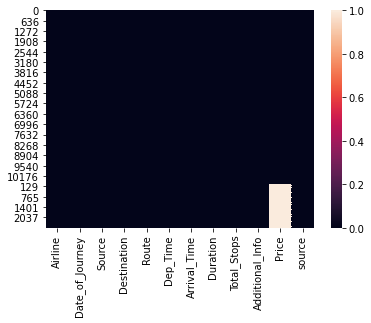

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.duplicated().sum()

246

In [20]:
df= df.drop_duplicates()

In [21]:
df.shape

(13108, 12)

In [22]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
source                      int64
dtype: object

# Data Visualization

Jet Airways                          4586
IndiGo                               2552
Air India                            2127
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64


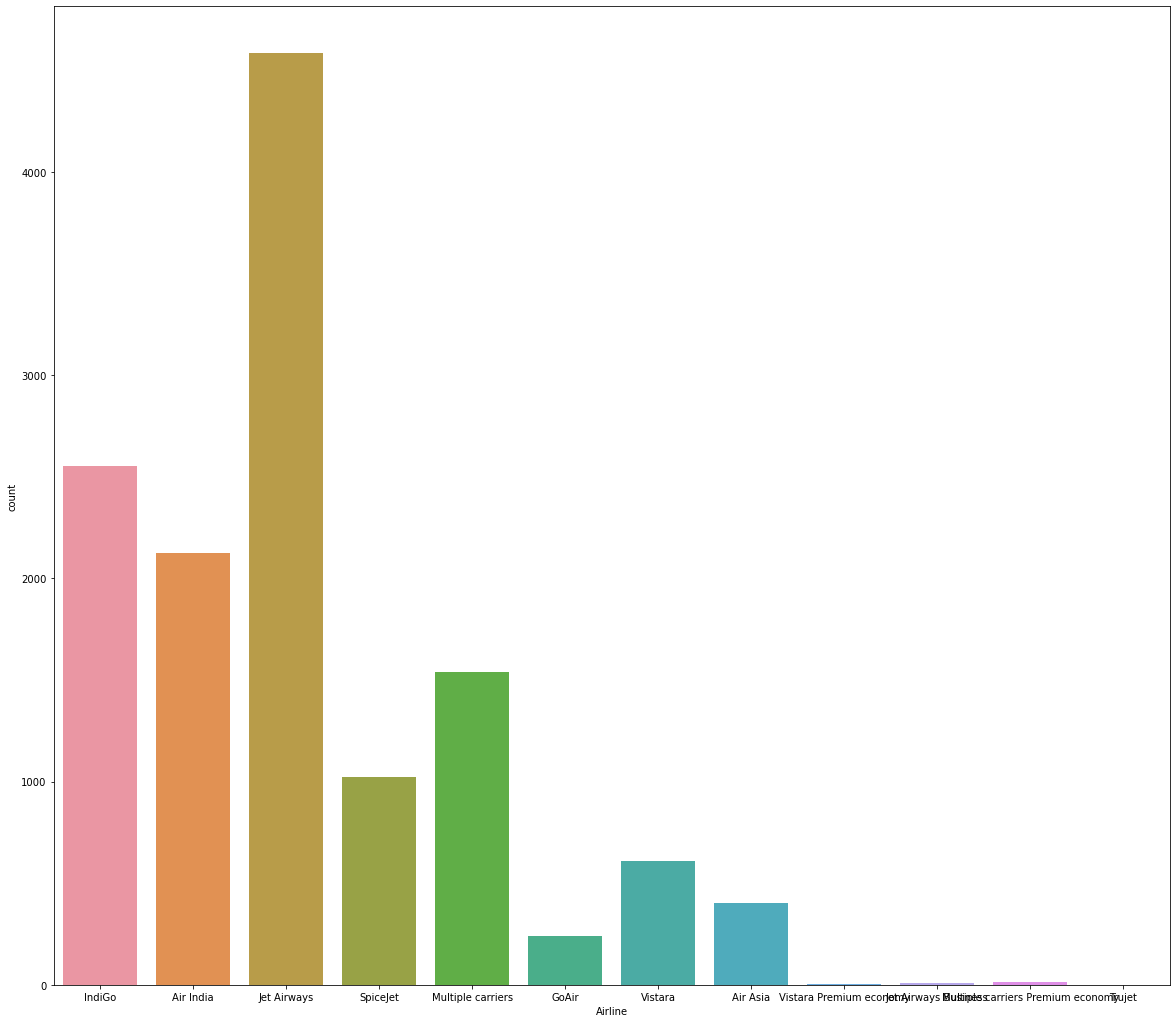

In [23]:
plt.figure(figsize=[20,18])
sns.countplot(df['Airline'])
print(df['Airline'].value_counts())
plt.show()

Maximum flights are of Jet airways.

Delhi       5473
Kolkata     3567
Banglore    2729
Mumbai       883
Chennai      456
Name: Source, dtype: int64


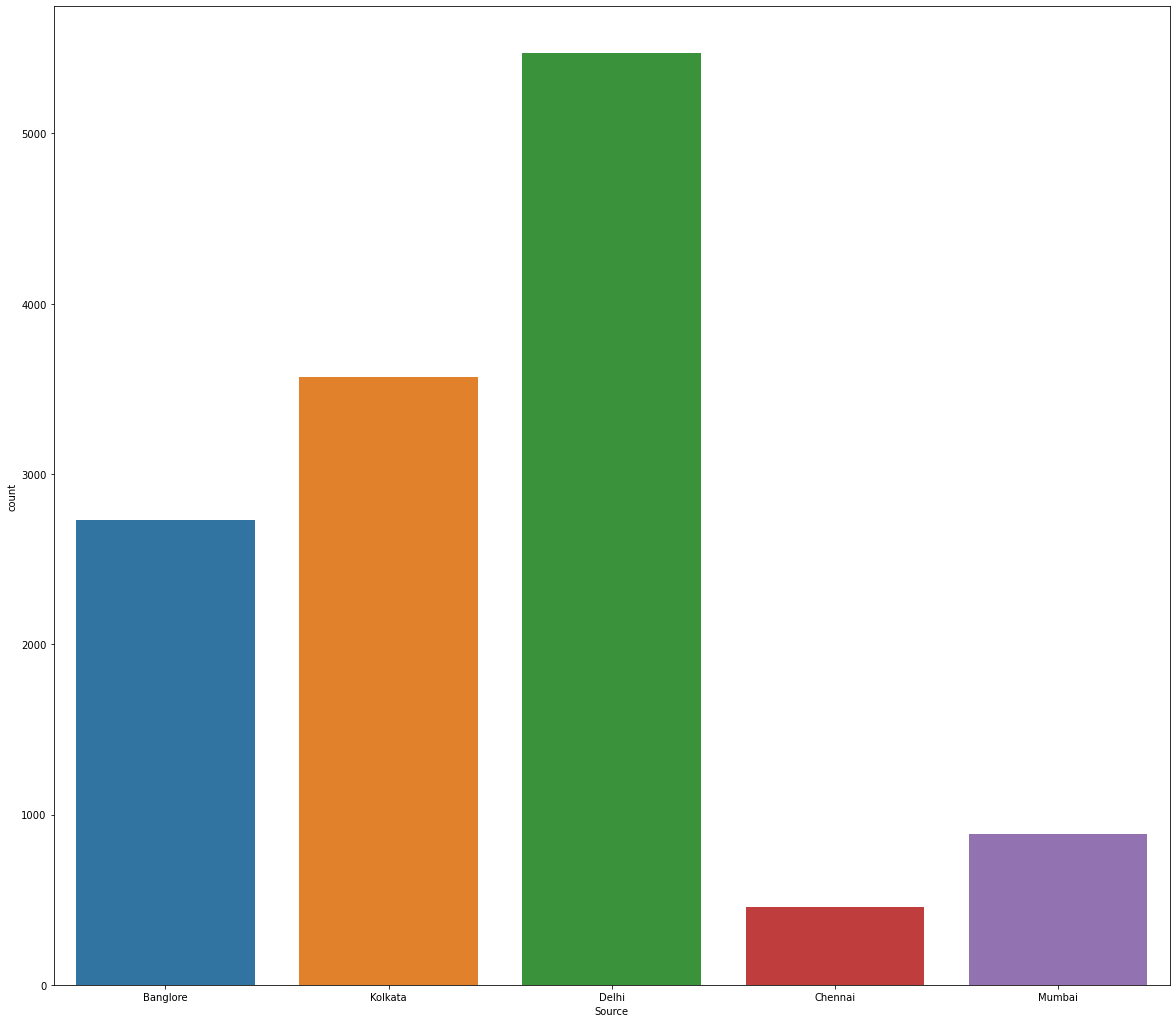

In [24]:
plt.figure(figsize=[20,18])
sns.countplot(df['Source'])
print(df['Source'].value_counts())
plt.show()

Maximum flights take-off from Delhi and Least flights takes off from Chennai.

Cochin       5473
Banglore     3567
Delhi        1582
New Delhi    1147
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


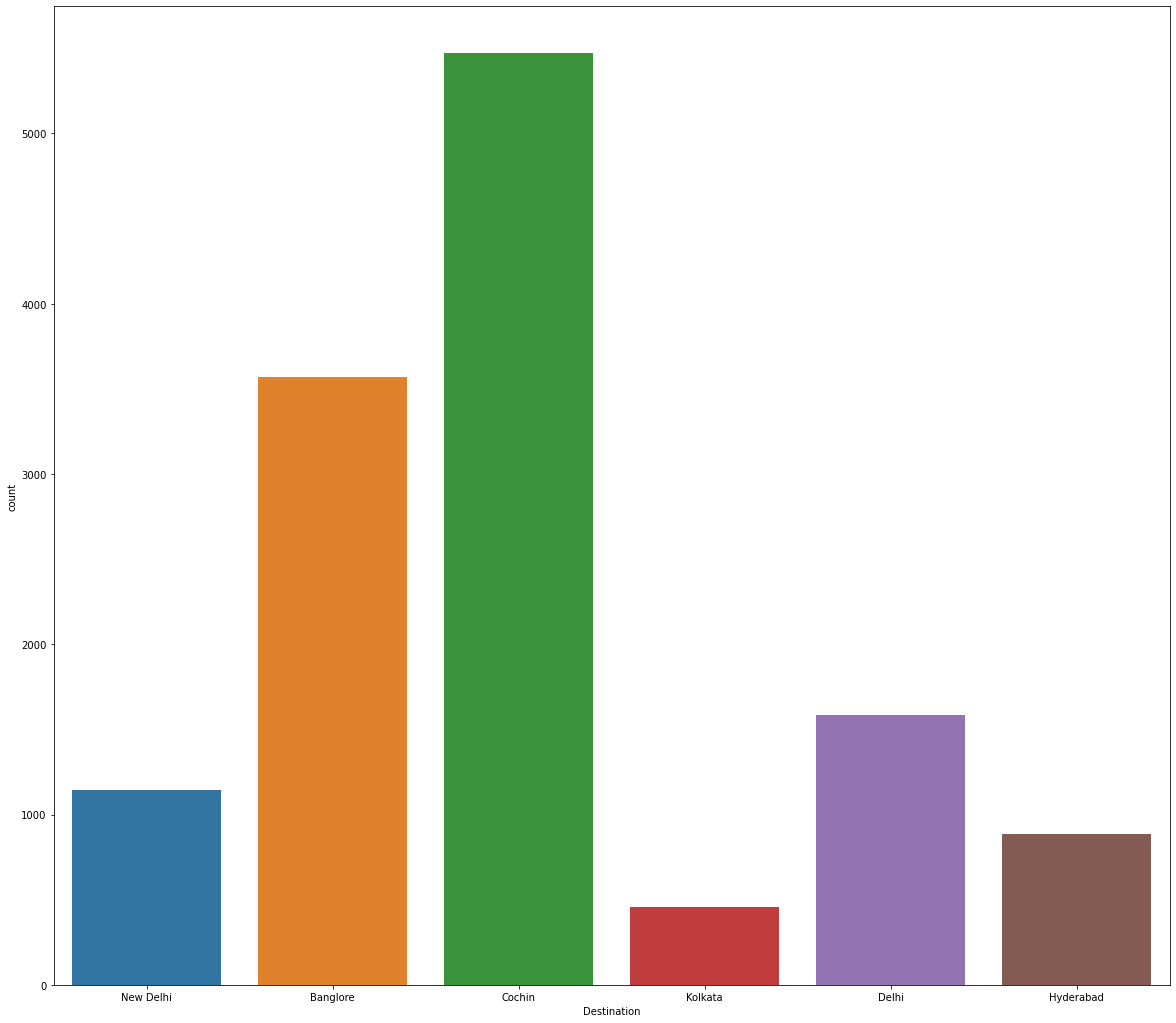

In [25]:
plt.figure(figsize=[20,18])
sns.countplot(df['Destination'])
print(df['Destination'].value_counts())
plt.show()

Maximum flights lands at Cochin and least flights lands at Kolkata

1 stop      7053
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64


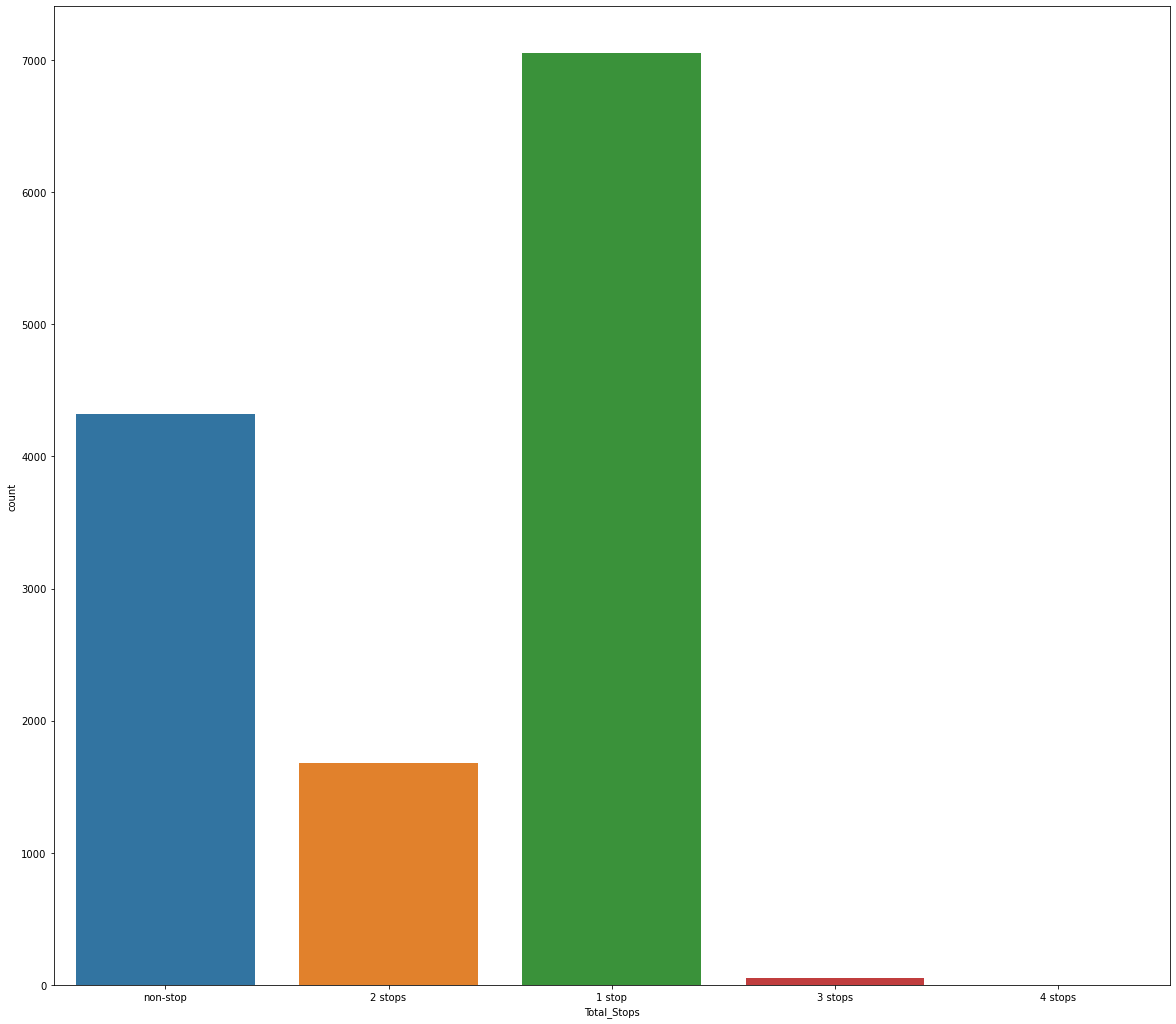

In [26]:
plt.figure(figsize=[20,18])
sns.countplot(df['Total_Stops'])
print(df['Total_Stops'].value_counts())
plt.show()

we have maximum flights with 1stop

No info                         10309
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64


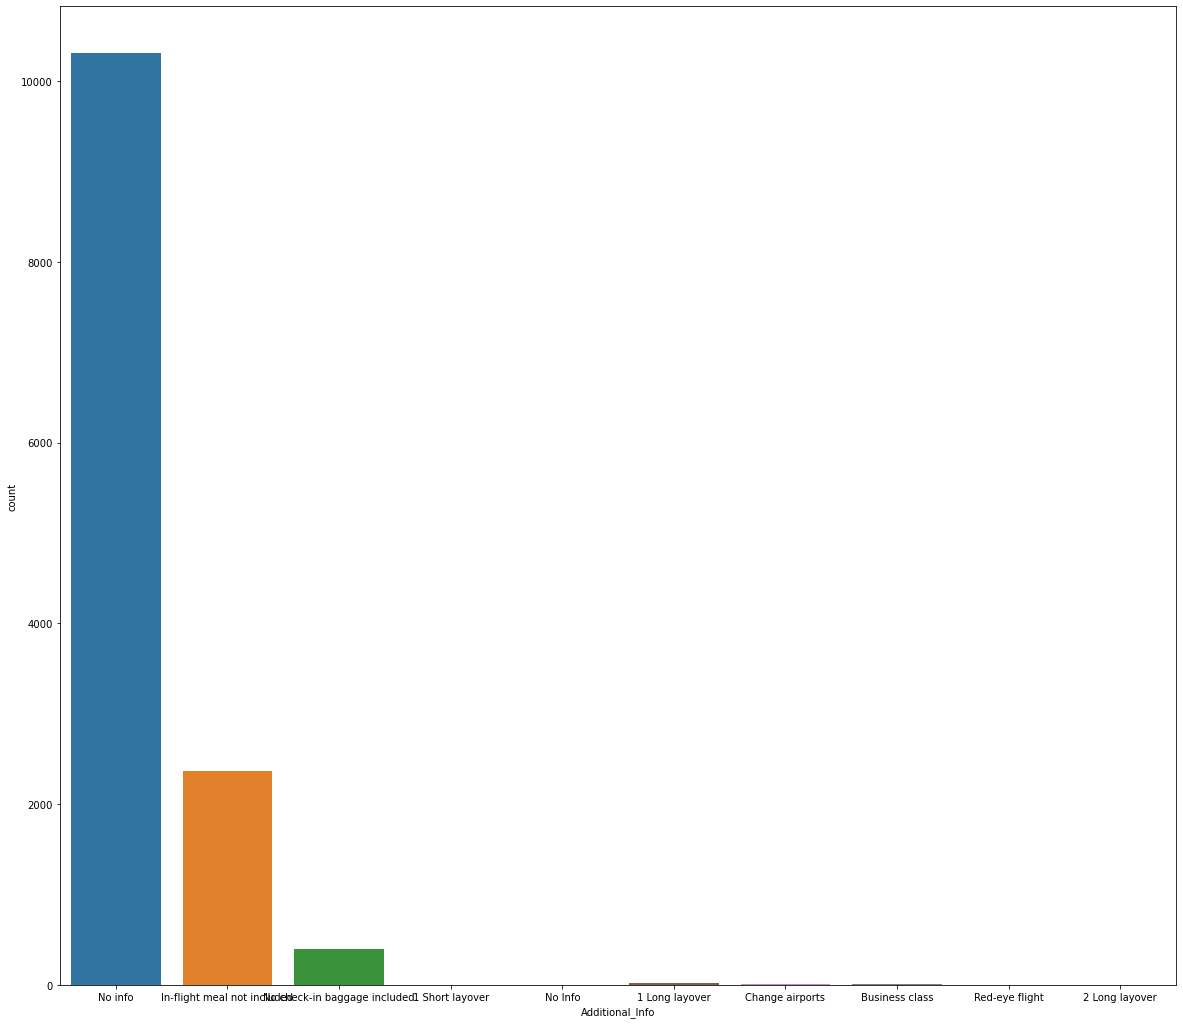

In [27]:
plt.figure(figsize=[20,18])
sns.countplot(df['Additional_Info'])
print(df['Additional_Info'].value_counts())
plt.show()

we have maximum flights with No info.

In [28]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info','No info')

In [29]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,0
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,0
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,0
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,0


In [30]:
# Dropping columns Date_of_Journey,Route,Dep_Time,Arrival_TIme as it will not impact our analysis.

df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [31]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,1
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1
...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1 stop,No info,NaN,0
2667,IndiGo,Kolkata,Banglore,2h 35m,non-stop,No info,NaN,0
2668,Jet Airways,Delhi,Cochin,6h 35m,1 stop,No info,NaN,0
2669,Air India,Delhi,Cochin,15h 15m,1 stop,No info,NaN,0


In [32]:
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [33]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897.0,1
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662.0,1
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882.0,1
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218.0,1
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302.0,1
...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1 stop,No info,NaN,0
2667,IndiGo,Kolkata,Banglore,155,non-stop,No info,NaN,0
2668,Jet Airways,Delhi,Cochin,395,1 stop,No info,NaN,0
2669,Air India,Delhi,Cochin,915,1 stop,No info,NaN,0


# Encoding the DataFrame

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
oe=OrdinalEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
        

In [37]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source
0,3.0,0.0,5.0,170,4.0,7.0,3897.0,1
1,1.0,3.0,0.0,445,1.0,7.0,7662.0,1
2,4.0,2.0,1.0,1140,1.0,7.0,13882.0,1
3,3.0,3.0,0.0,325,0.0,7.0,6218.0,1
4,3.0,0.0,5.0,285,0.0,7.0,13302.0,1
...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,1435,0.0,7.0,NaN,0
2667,3.0,3.0,0.0,155,4.0,7.0,NaN,0
2668,4.0,2.0,1.0,395,0.0,7.0,NaN,0
2669,1.0,2.0,1.0,915,0.0,7.0,NaN,0


In [38]:
df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source
count,13108.000000,13108.000000,13108.000000,13108.000000,13108.000000,13108.000000,10463.000000,13108.000000
mean,3.990616,1.955676,1.437672,631.024184,1.455294,6.594141,9026.642454,0.798215
std,2.374939,1.186289,1.477846,500.762897,1.817298,0.823699,4624.653227,0.401348
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,7.000000,5224.000000,1.000000
50%,4.000000,2.000000,1.000000,505.000000,0.000000,7.000000,8266.000000,1.000000
75%,4.000000,3.000000,2.000000,910.000000,4.000000,7.000000,12343.500000,1.000000
max,11.000000,4.000000,5.000000,2860.000000,4.000000,8.000000,79512.000000,1.000000


There are chances of having outliers and skewness in some columns.

# Checking the correlation

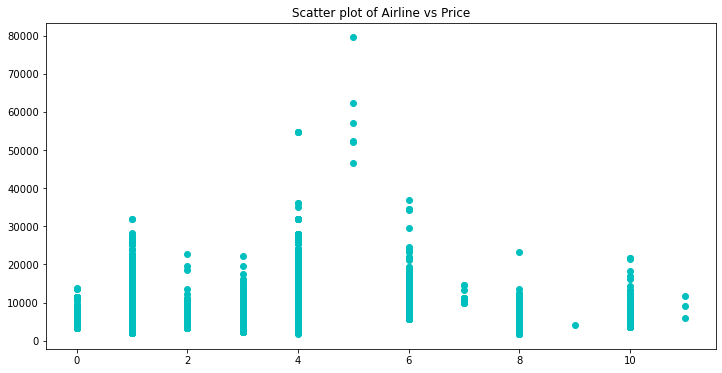

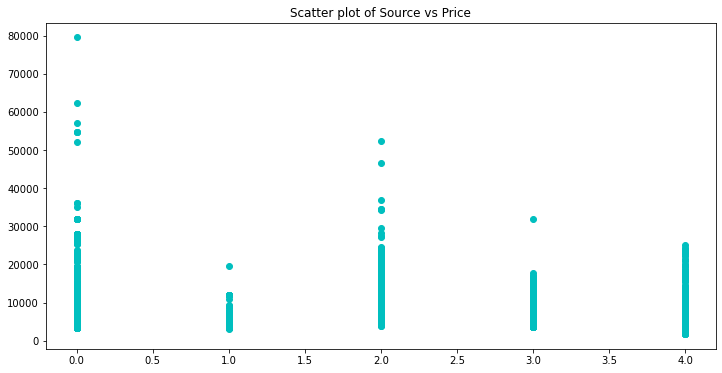

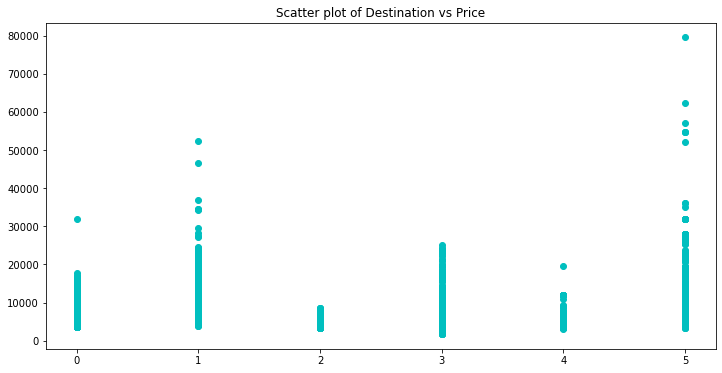

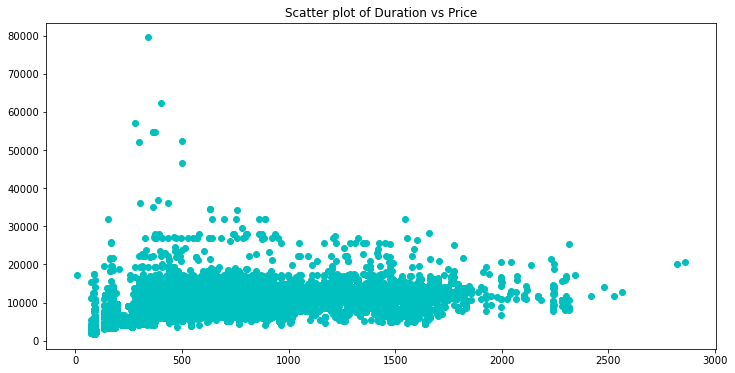

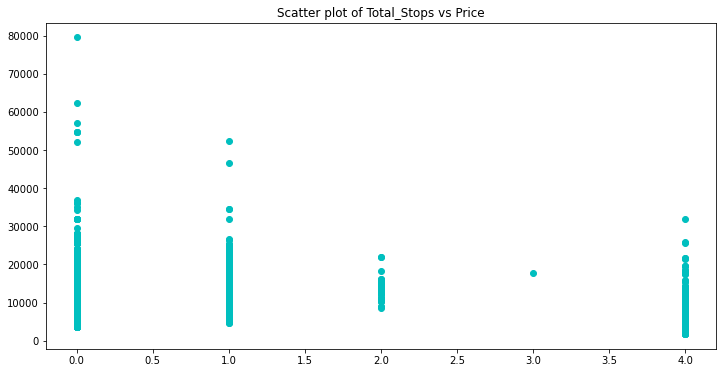

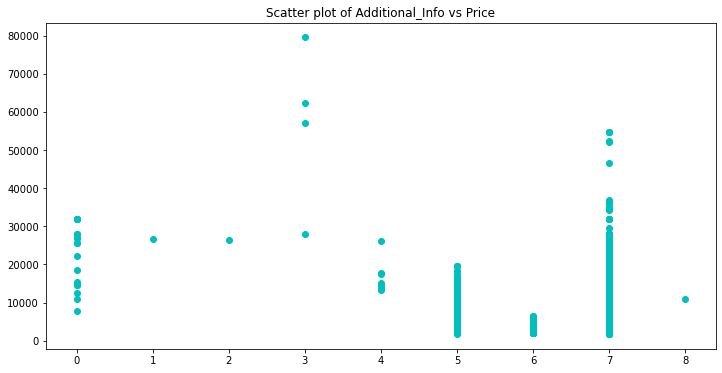

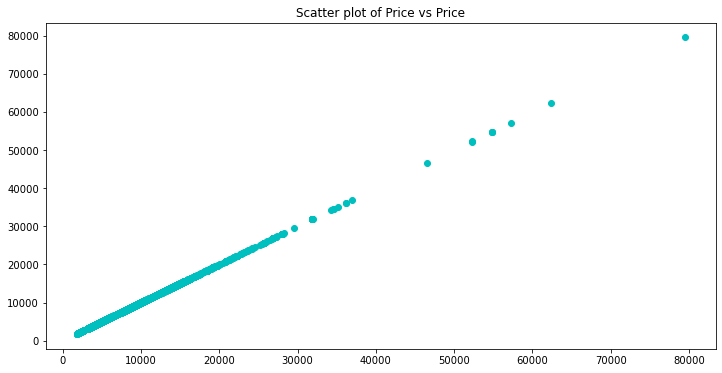

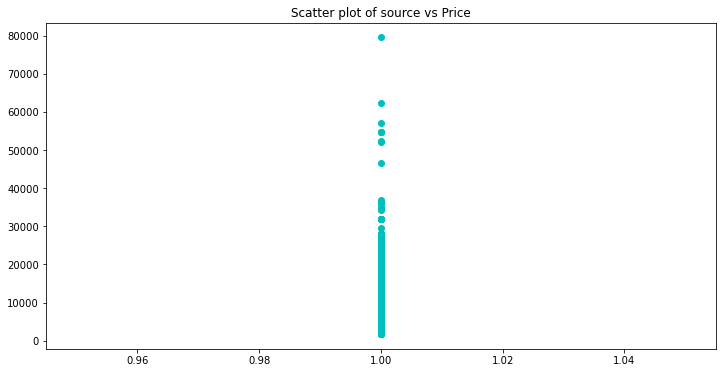

In [39]:
for i in df.columns:
    plt.figure(figsize=[12,6])
    plt.scatter(x = df[i] ,y = df['Price'] , color = 'c')
    plt.title('Scatter plot of {} vs Price'.format(i))
    plt.show()


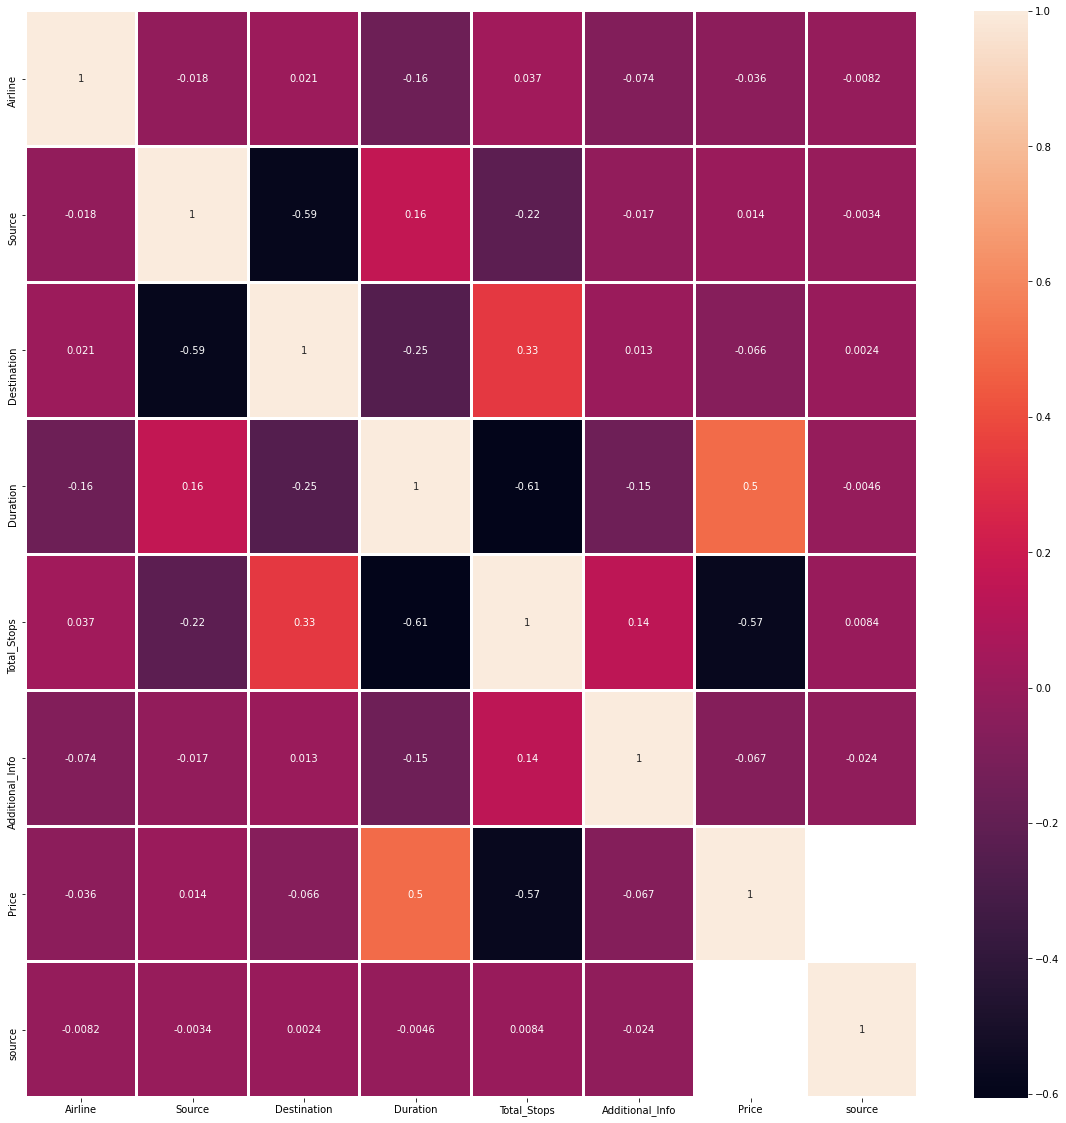

In [40]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,linewidths=2.0)
plt.show()

Observations:
- Destination is positively correlated to Total_stops.
- Duration is positviely correlated to Price and negatively correlated to Total_Stops.
- Total_Stops is negatively correlated to Price and Duration. And positively correlated to Additional_Info and Destination.
- Additional_Info is positively correlated to Total_Stops.
- Price is negatively correlated to Total_Stops and Duration.

In [41]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'source'],
      dtype='object')

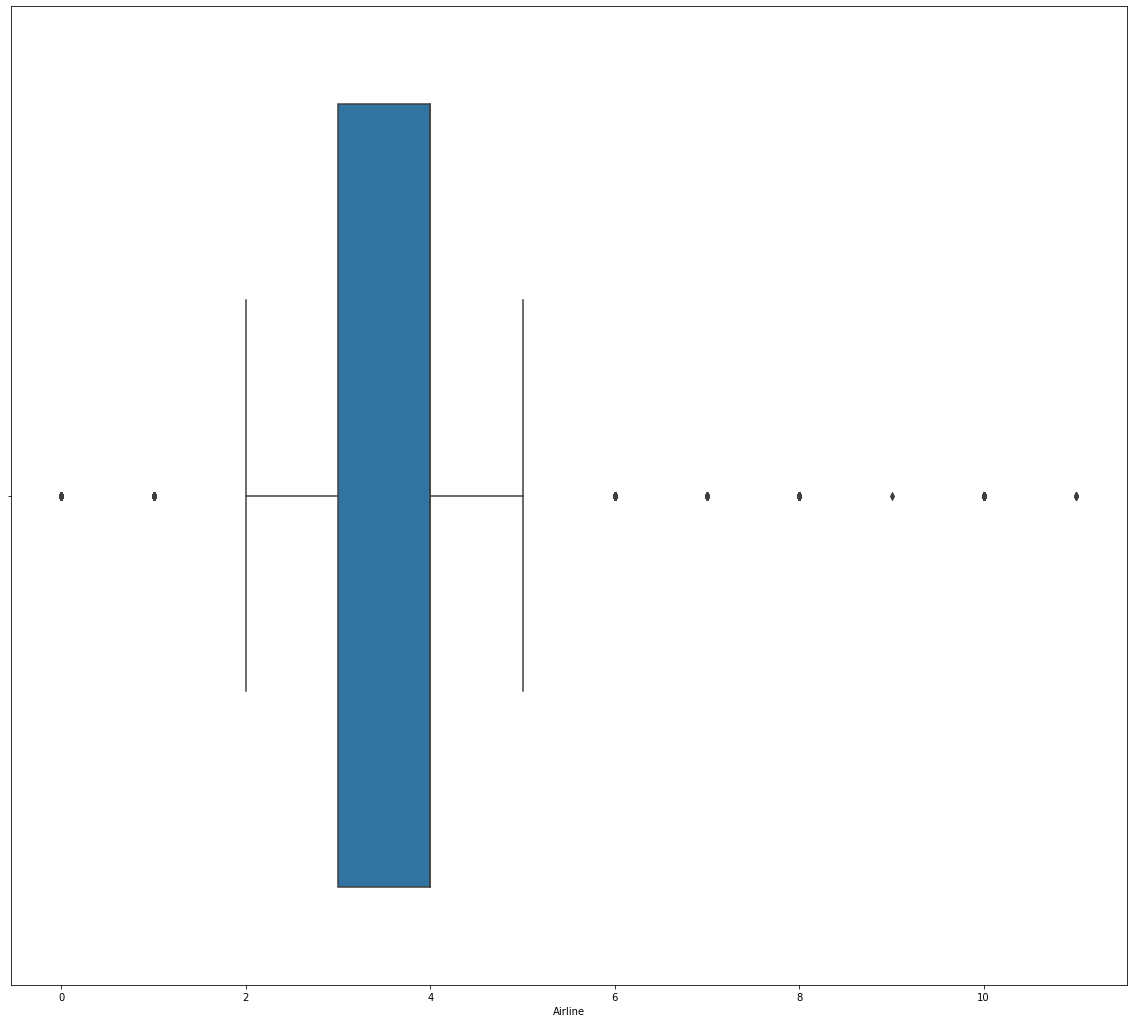

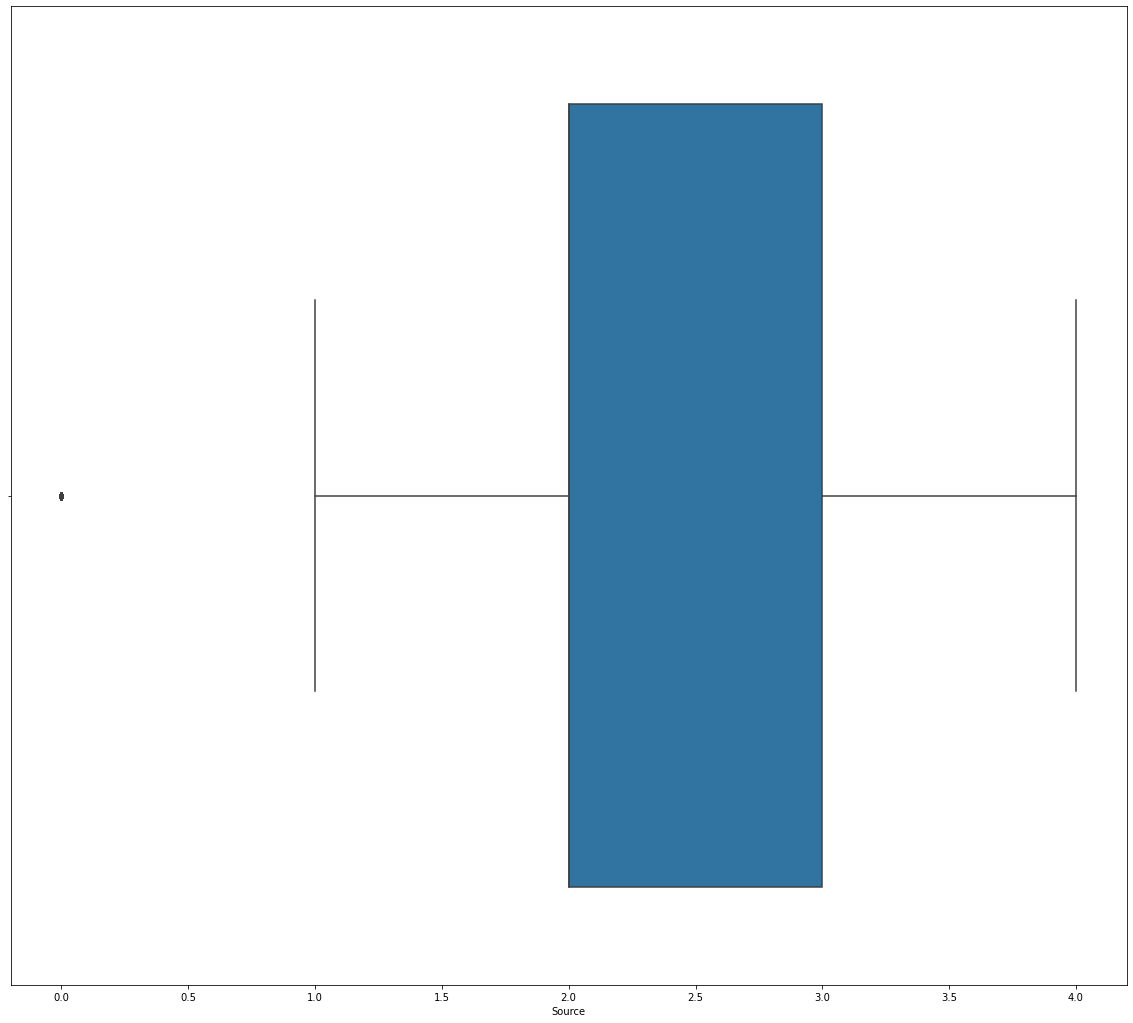

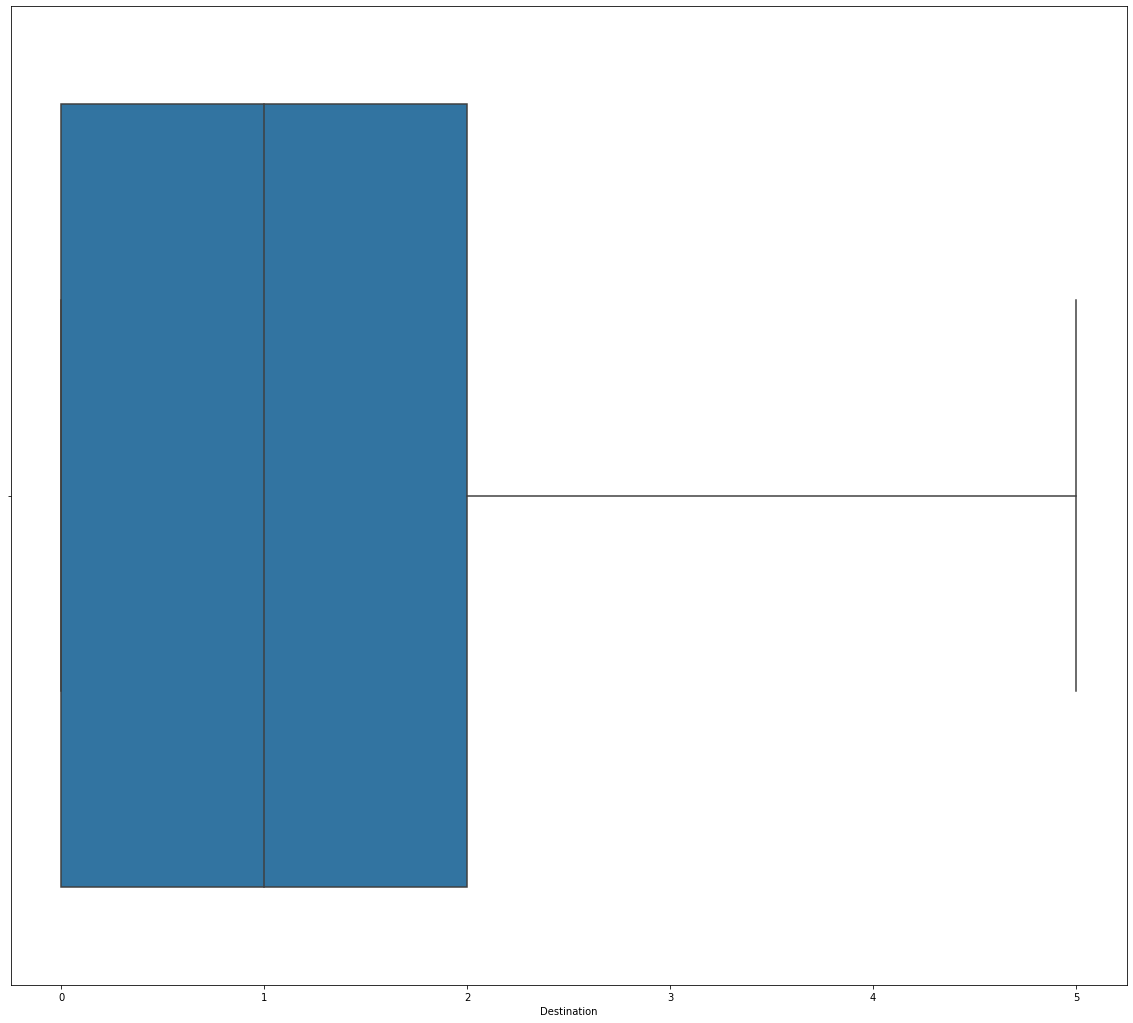

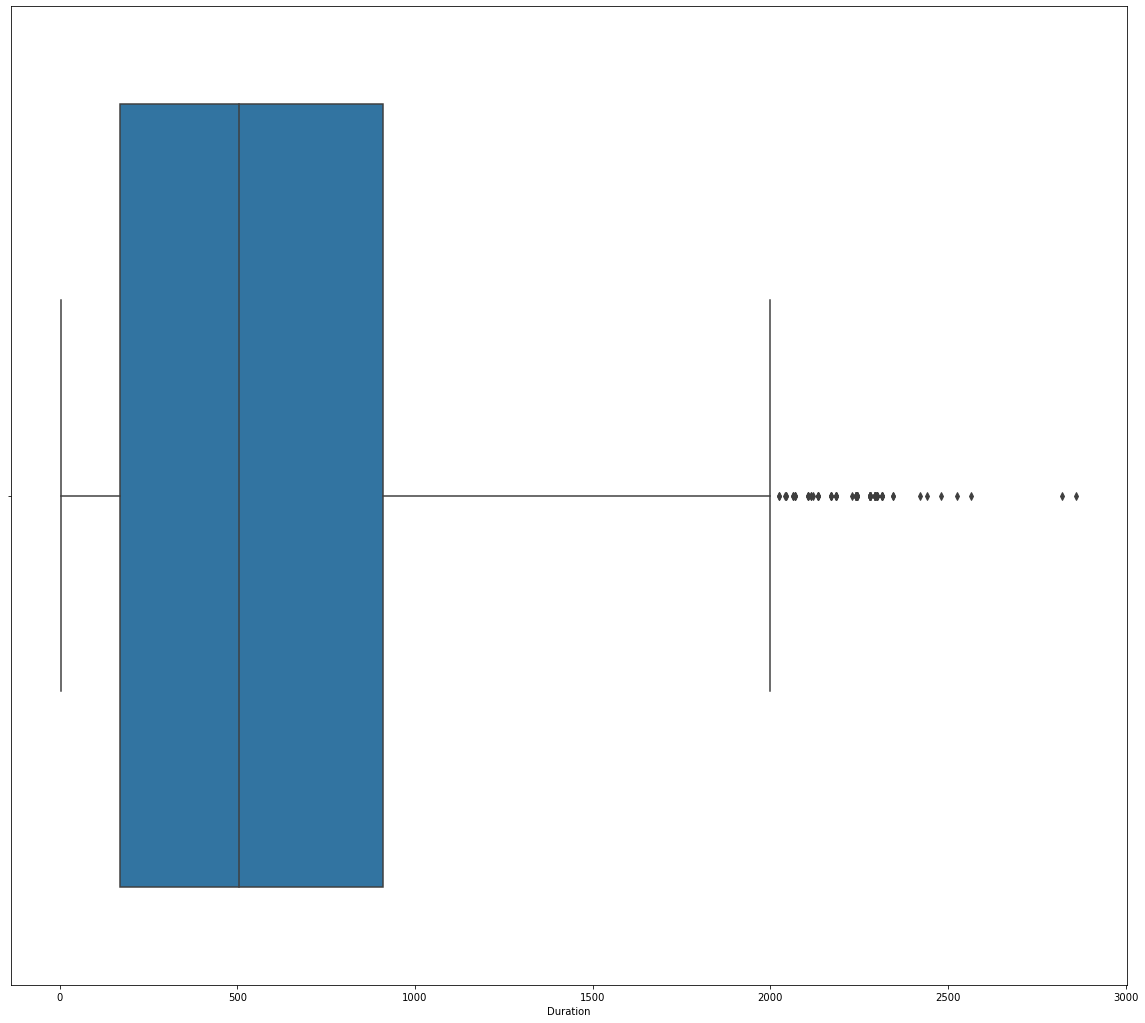

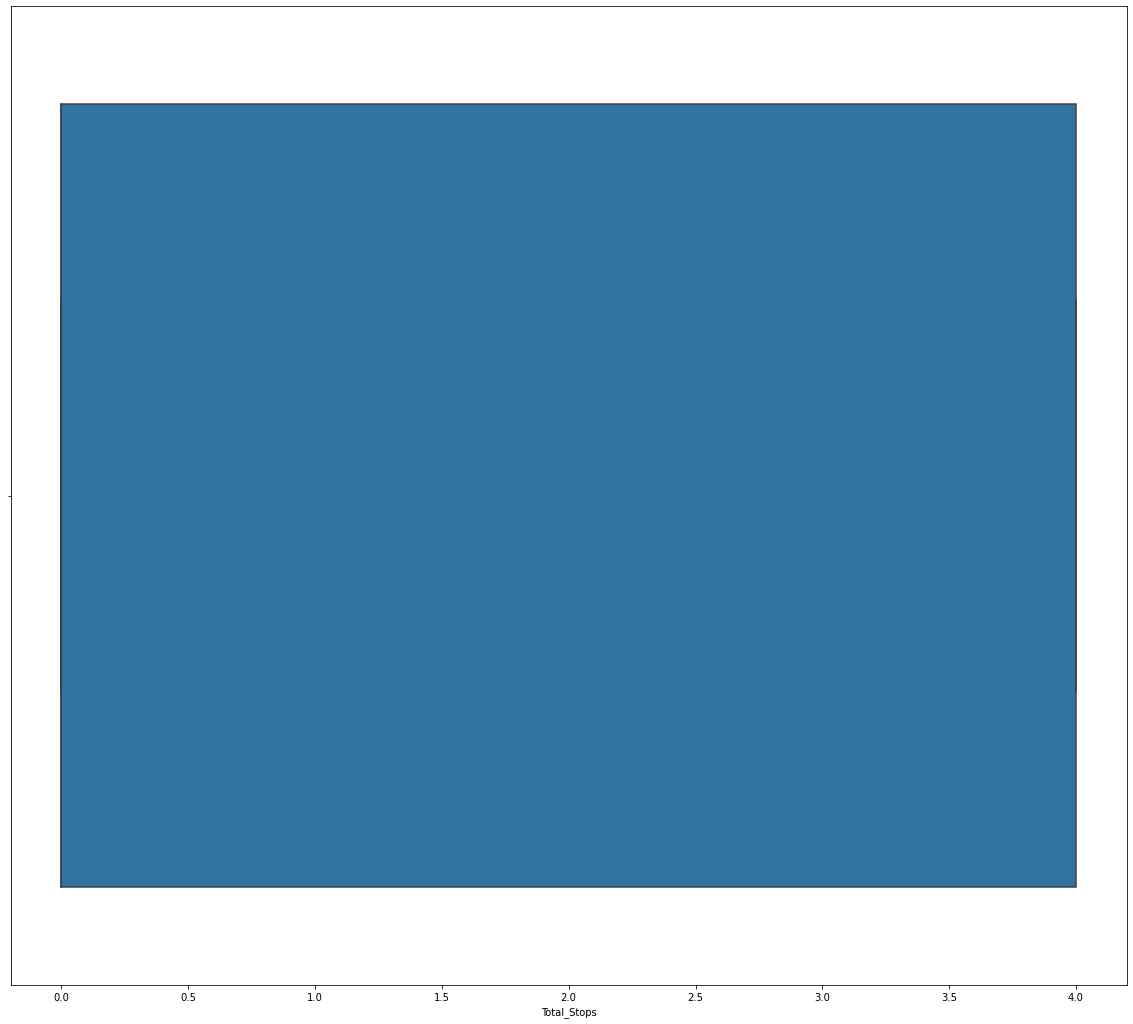

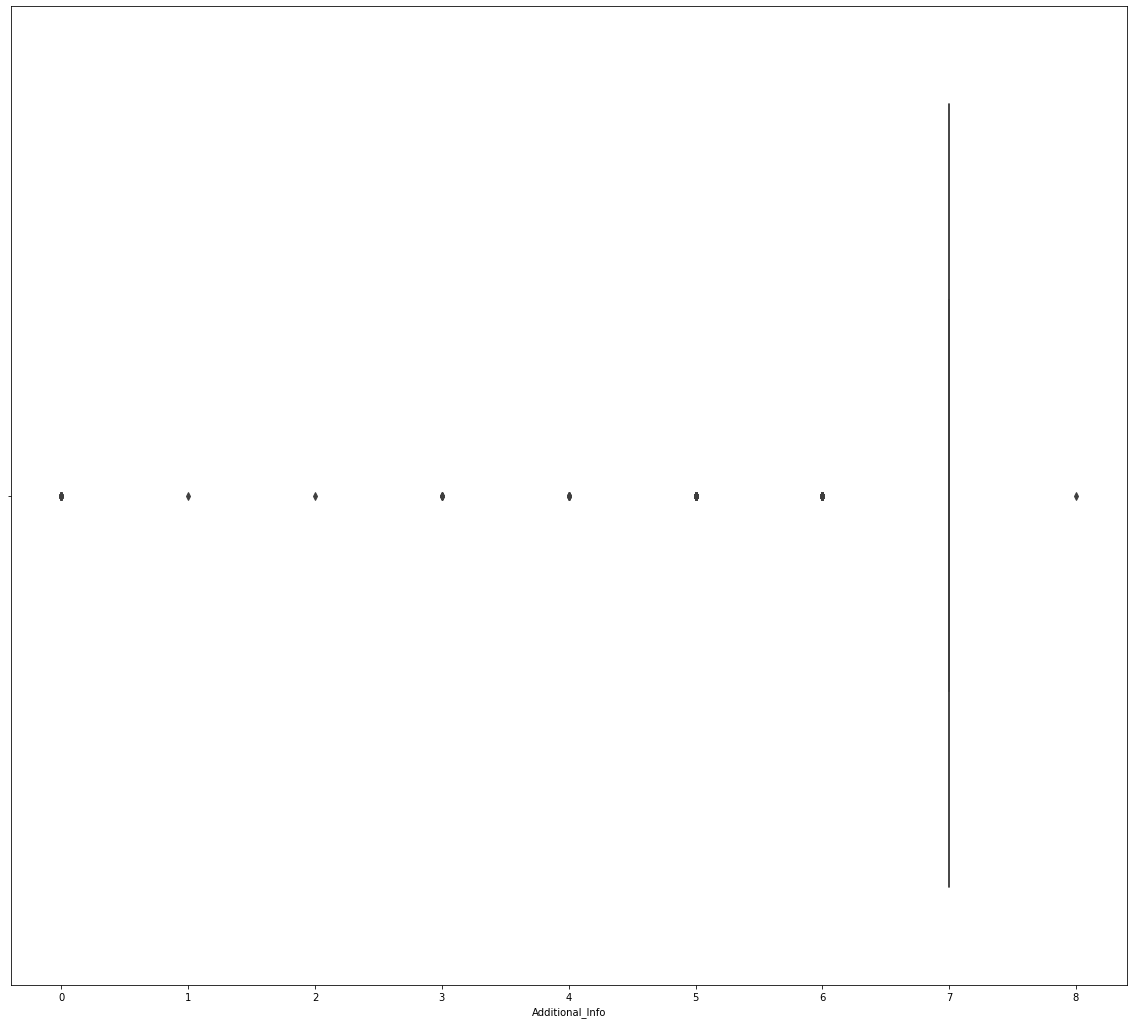

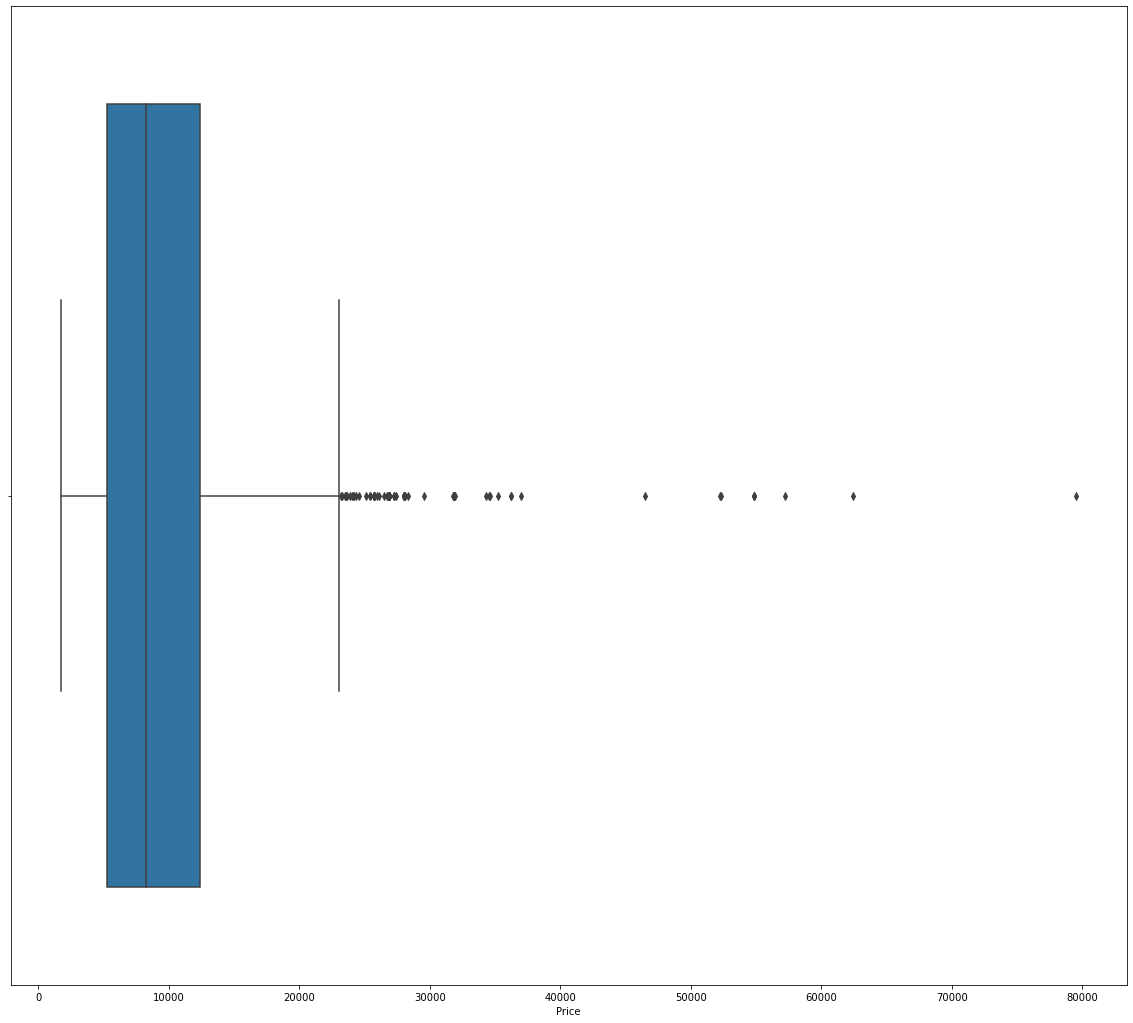

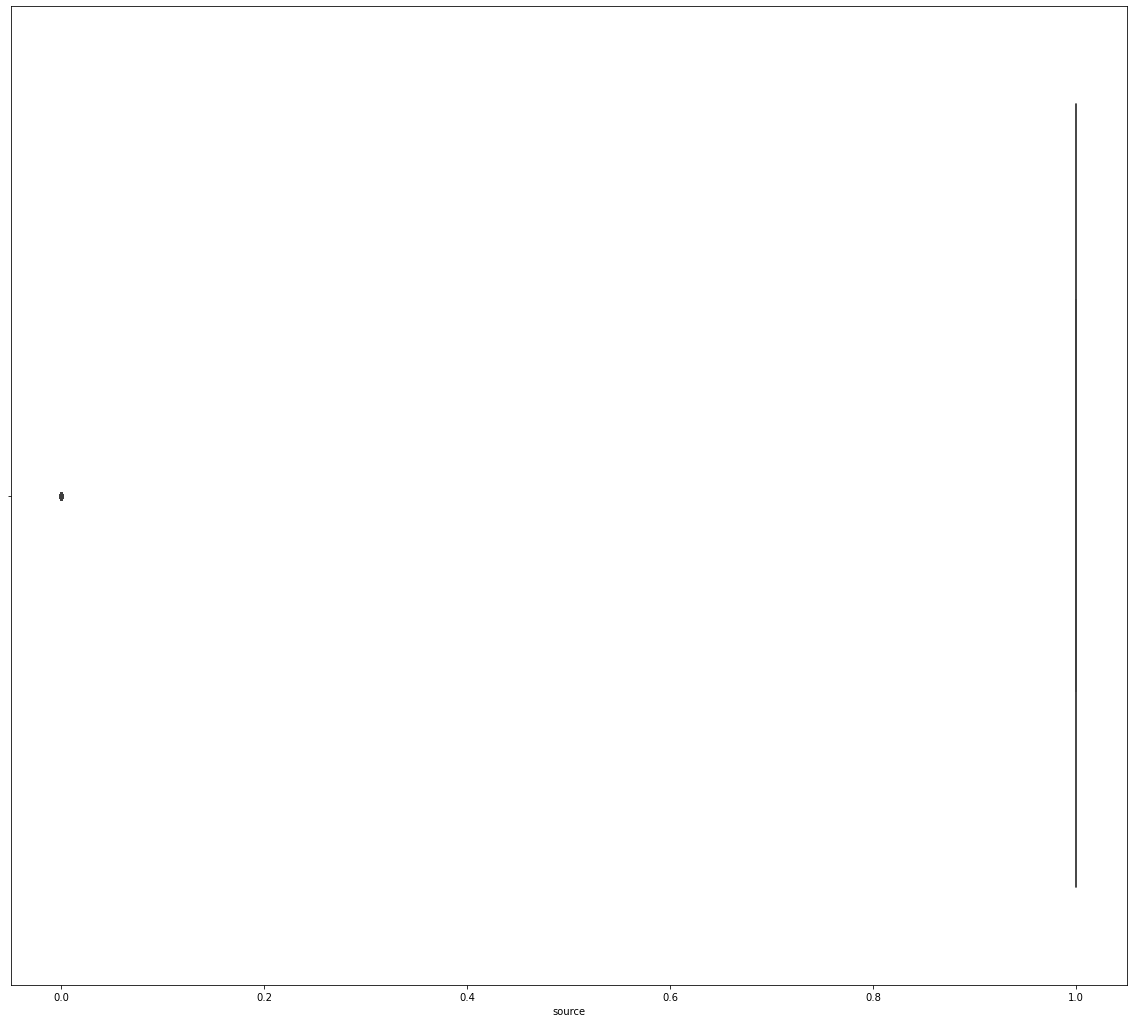

In [42]:
for i in df.columns:
    plt.figure(figsize=[20,18])
    sns.boxplot(df[i])
    plt.show()

We can see outliers in Source, Price,Additional_Info,Duration,Source,Airline. However, we will only treat outliers for
Duration column as all the other columns are categorical in nature and Price is our target variable.

# Data Distribution

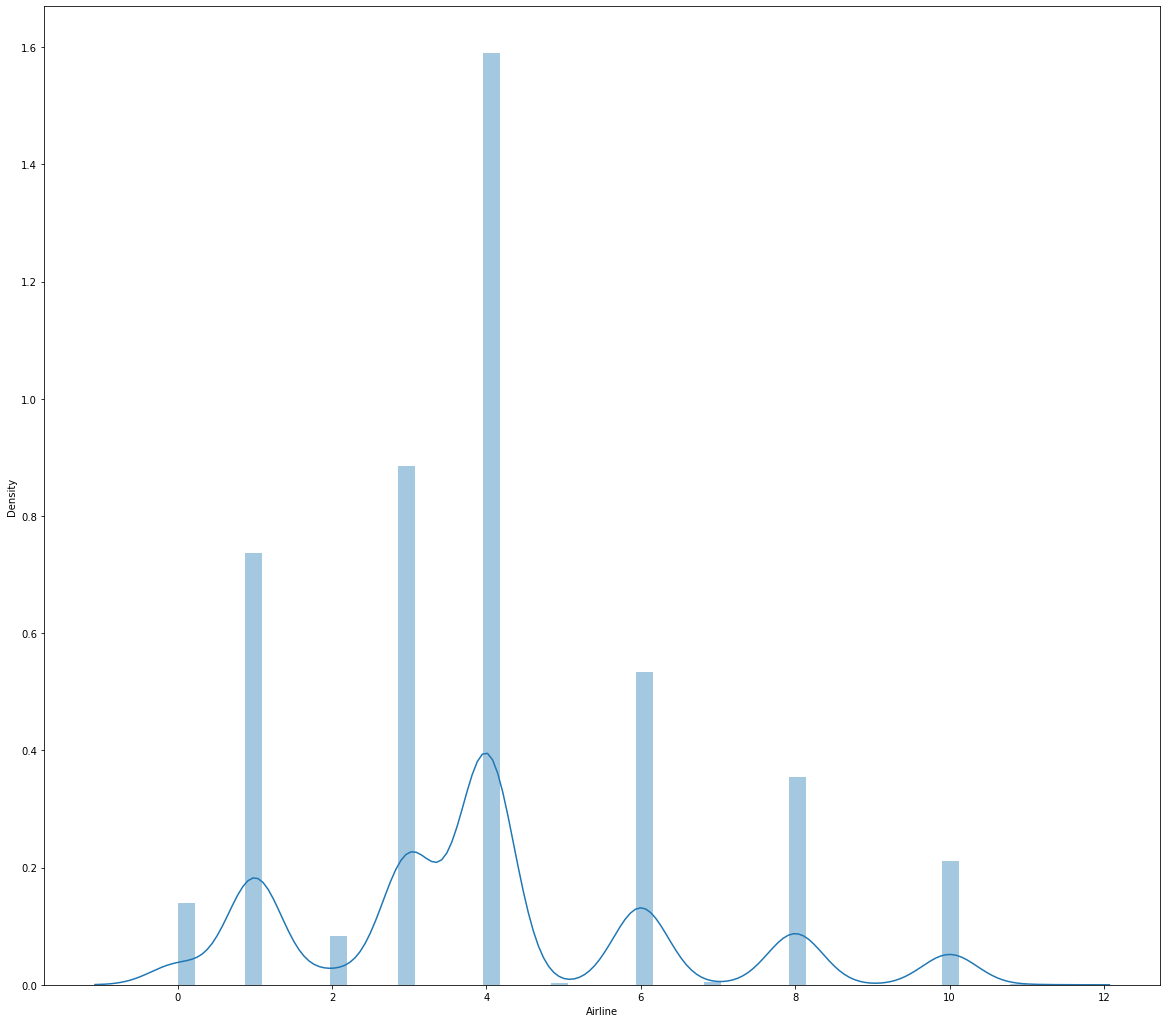

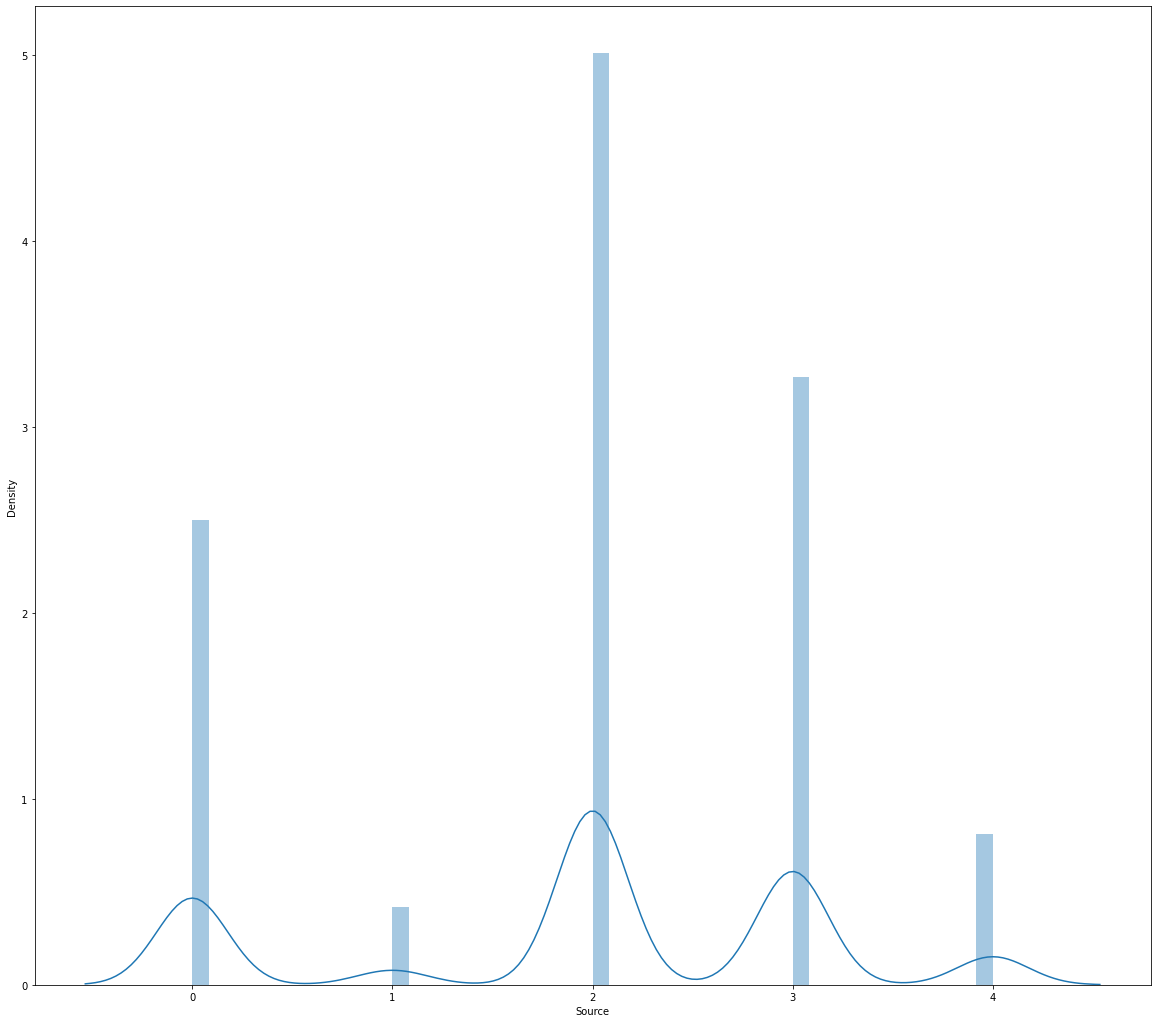

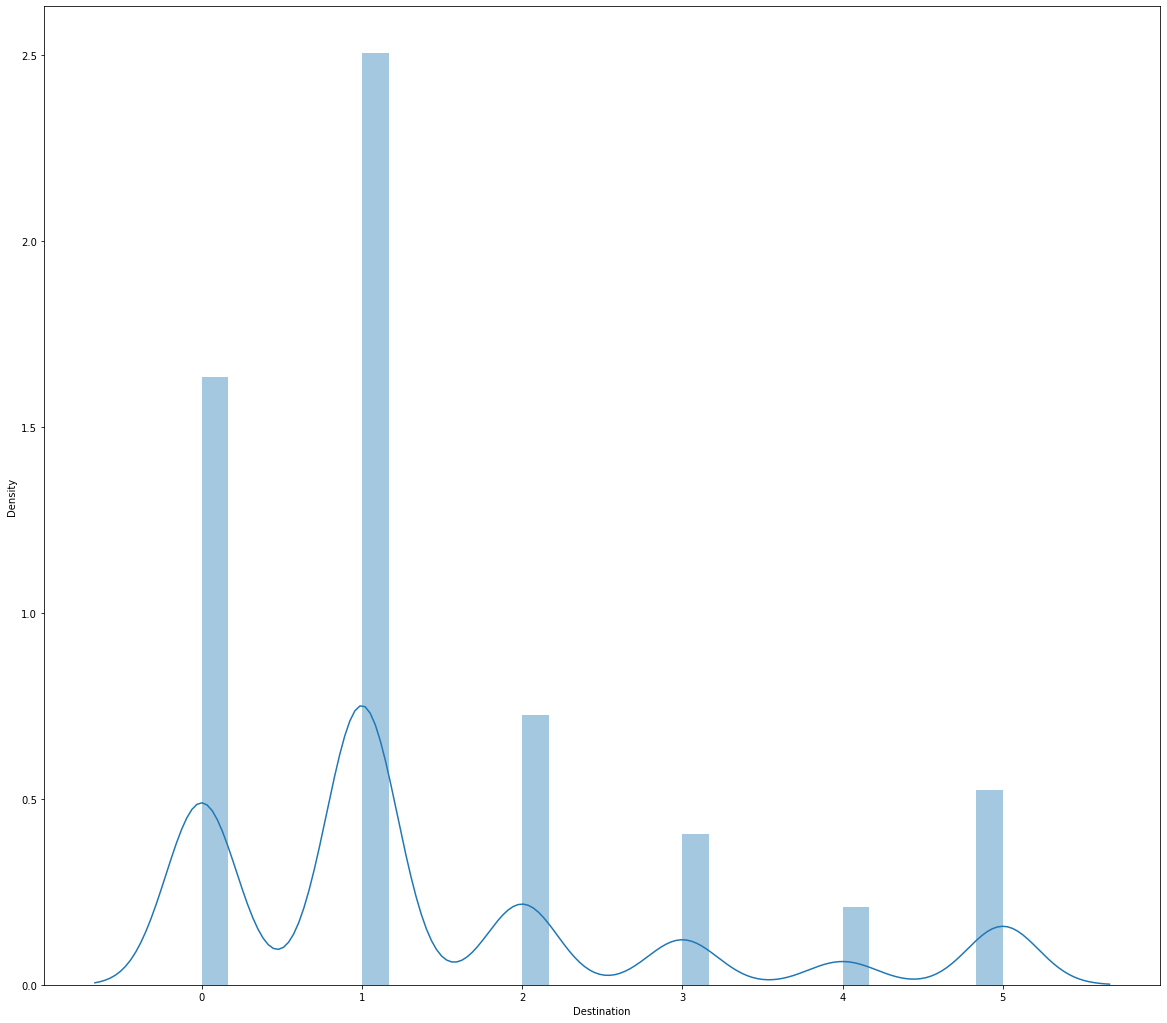

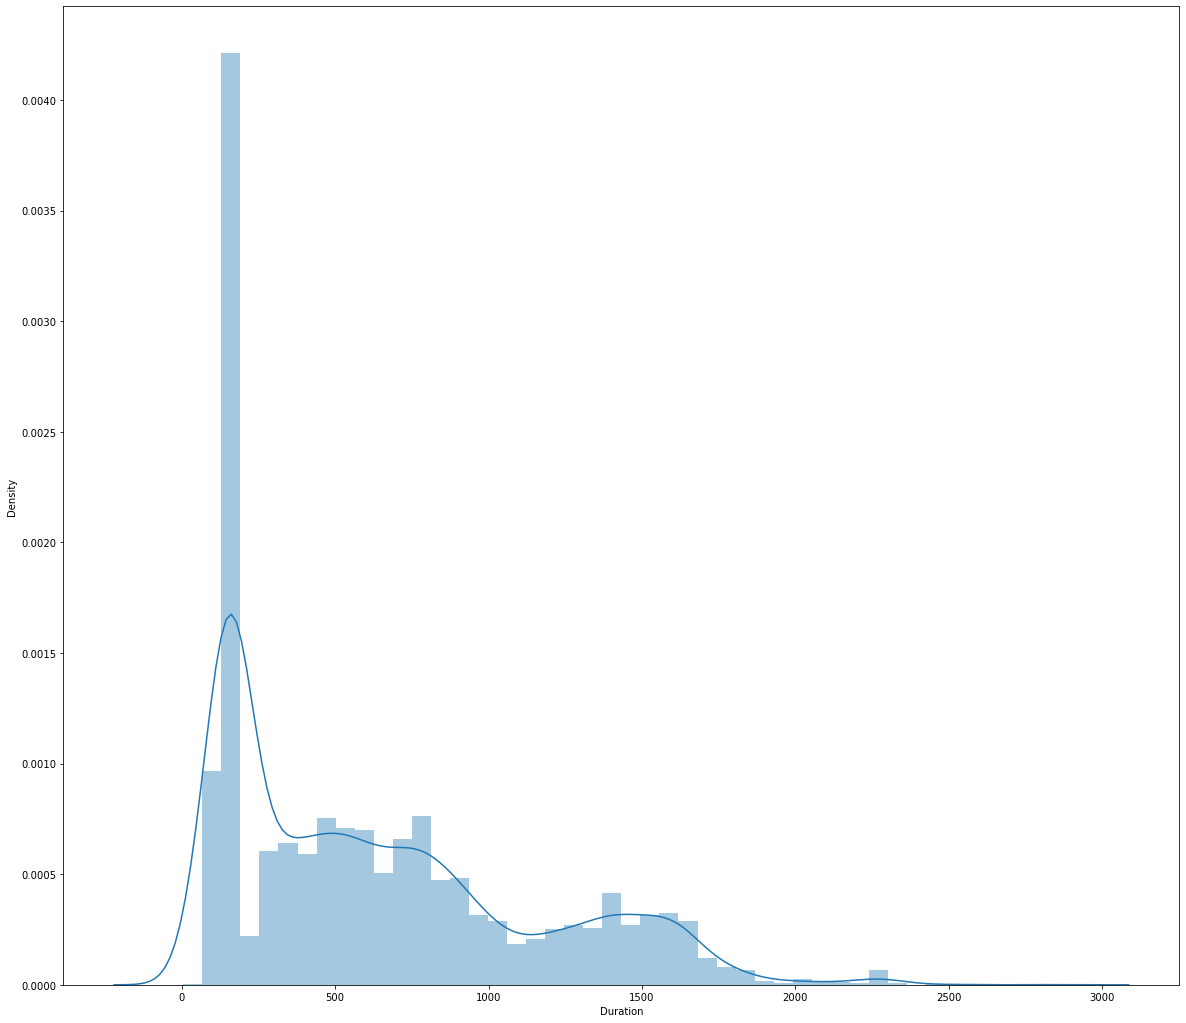

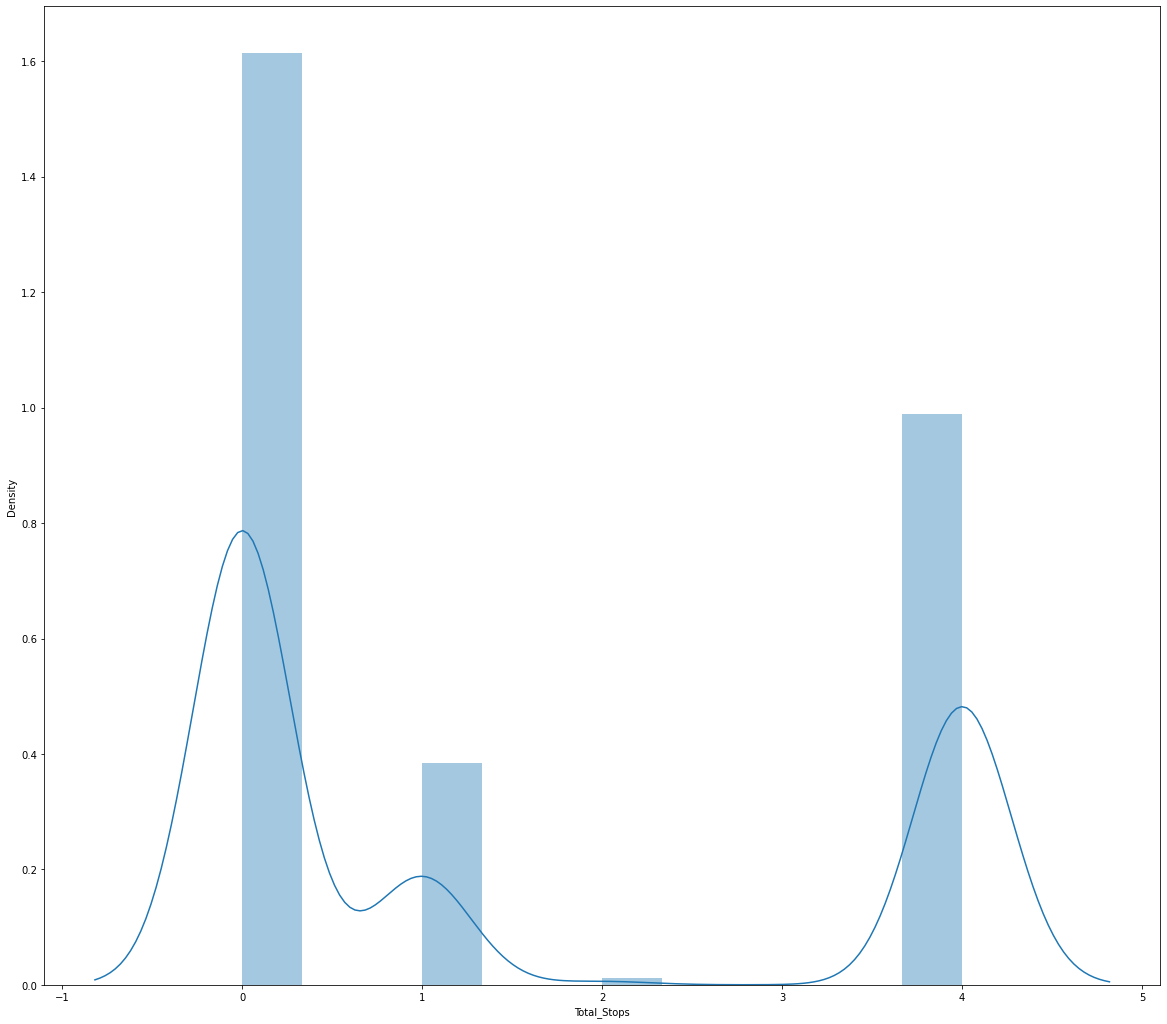

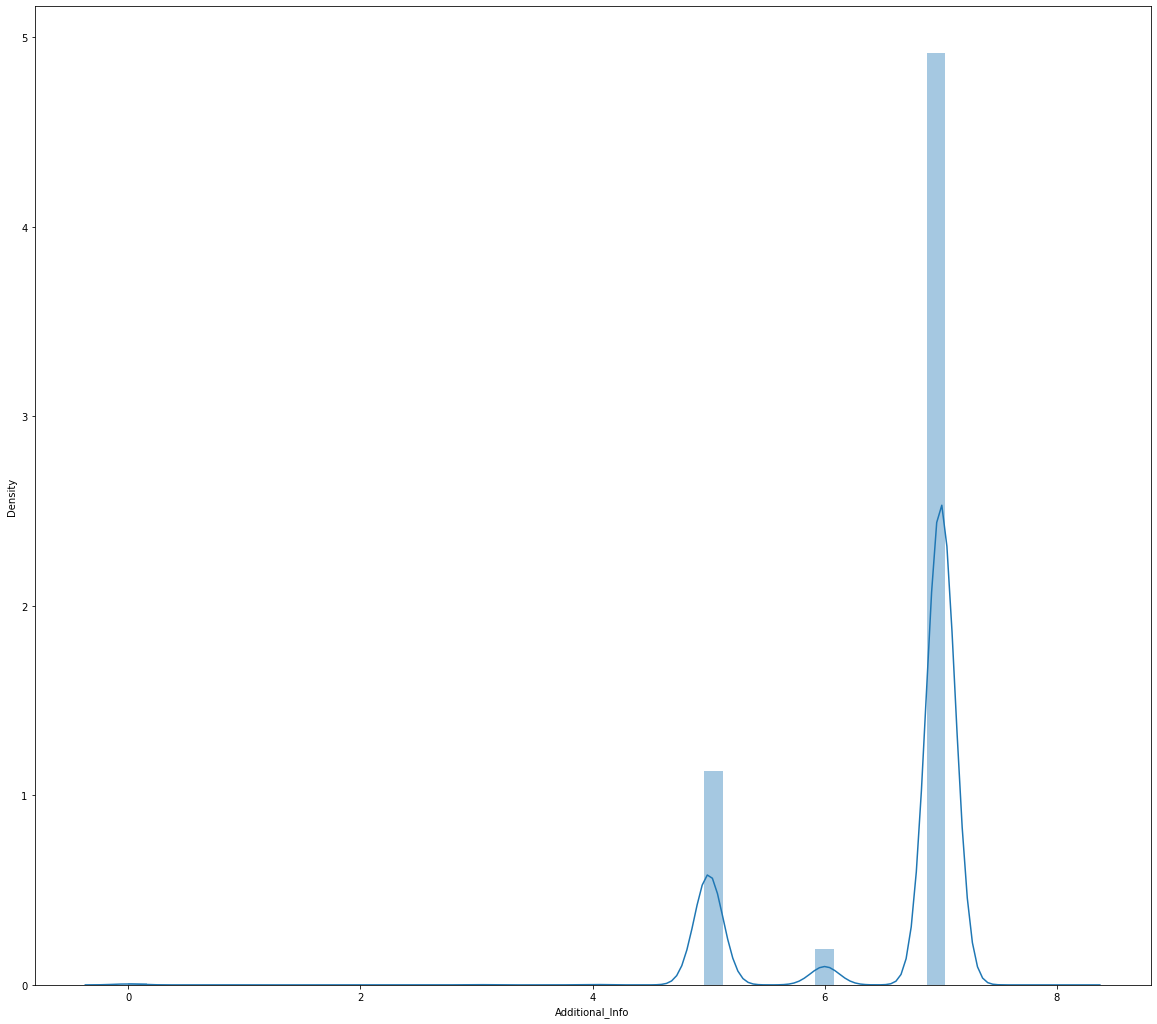

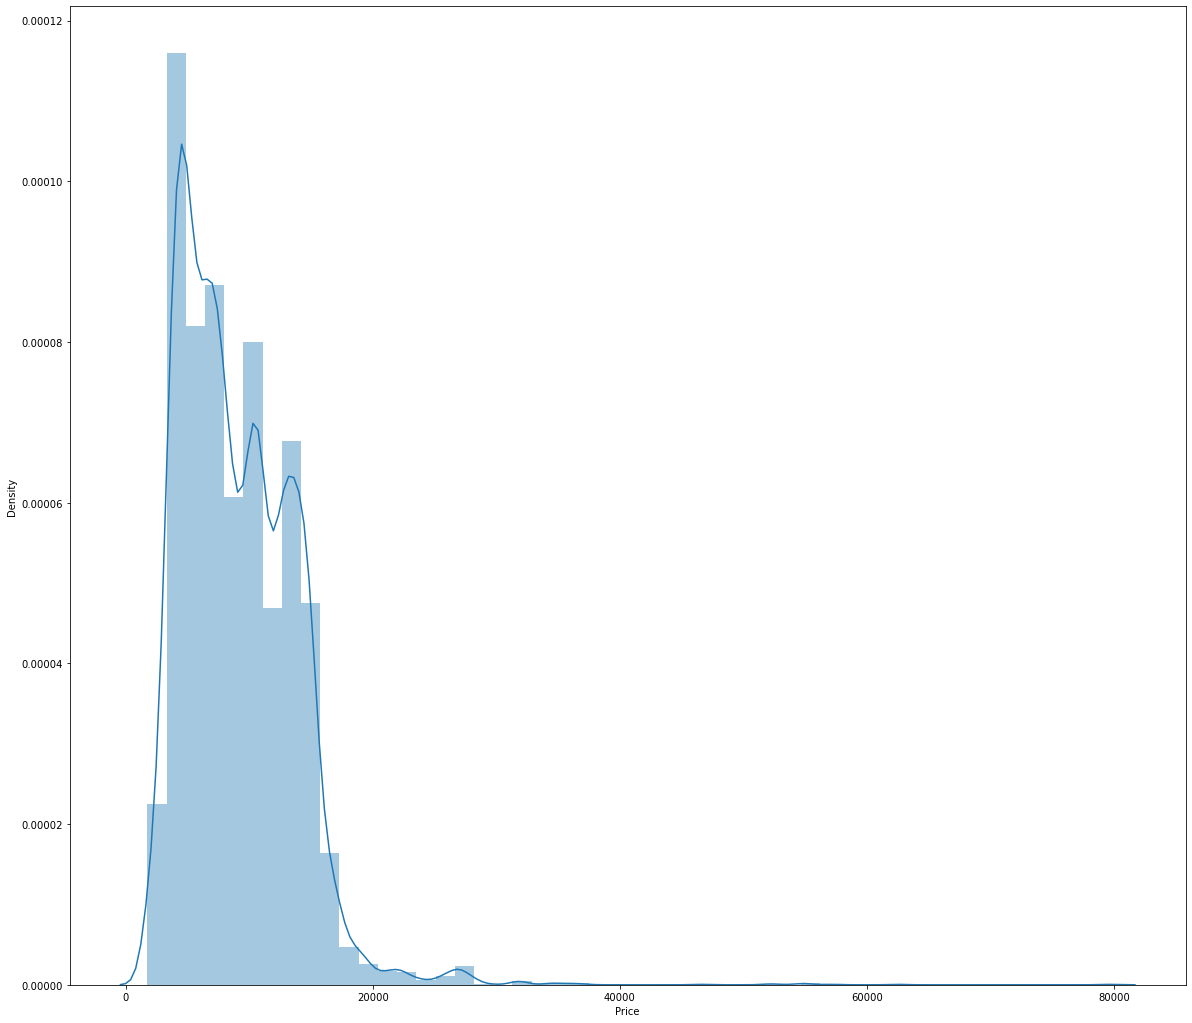

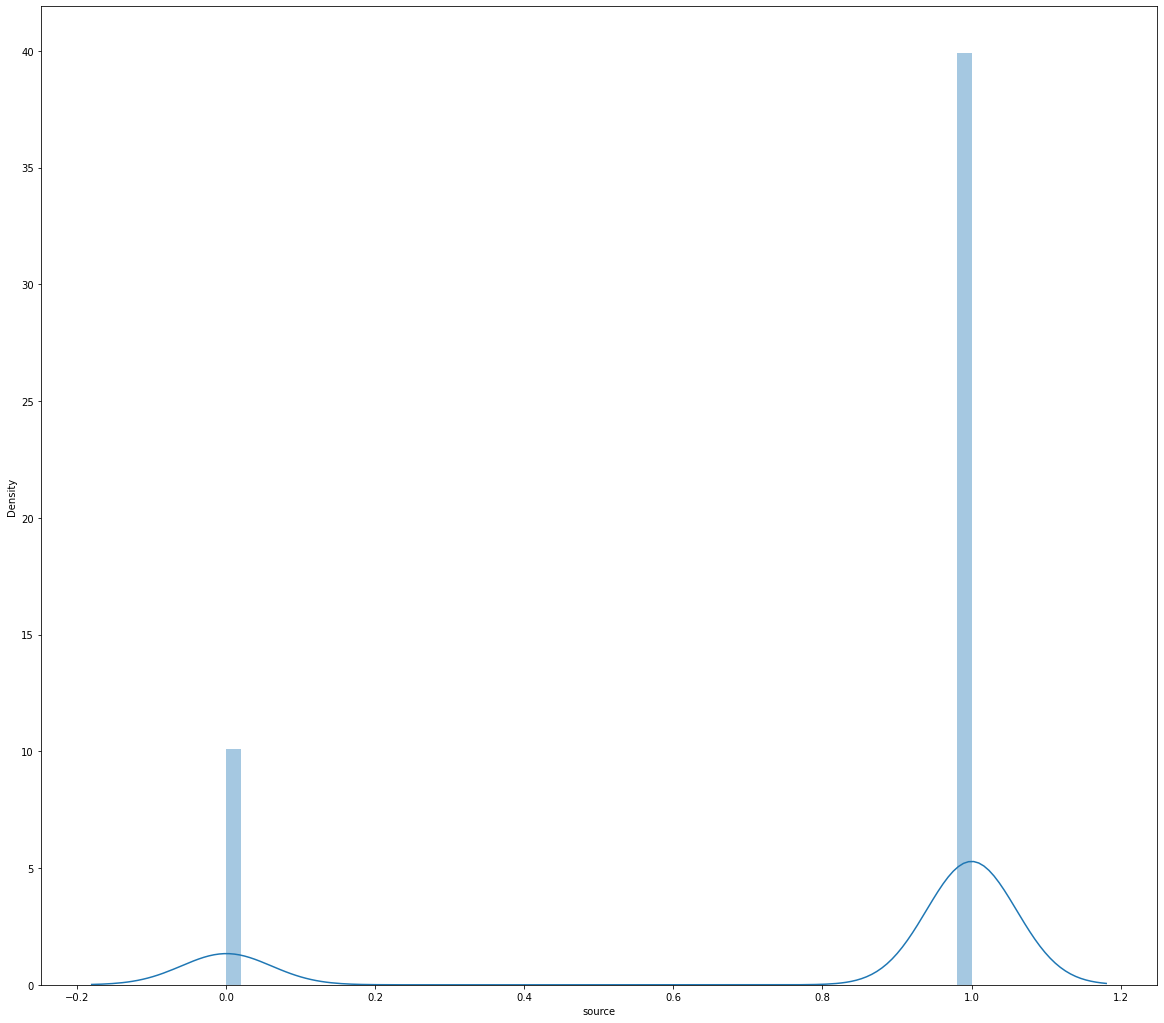

In [43]:
for i in df.columns:
    plt.figure(figsize=[20,18])
    sns.distplot(df[i])
    plt.show()

Data in few columns is slightly skewed.

# Removing the Outliers

In [44]:
IQR = df['Duration'].quantile(0.75) - df['Duration'].quantile(0.25)
lower_bridge=df['Duration'].quantile(0.25)-IQR*1.5
upper_bridge=df['Duration'].quantile(0.75)+IQR+1.5
print('Lower_bridge is',lower_bridge)
print('Upper_bridge is',upper_bridge)

Lower_bridge is -940.0
Upper_bridge is 1651.5


In [45]:
data=df.copy()

In [46]:
data.loc[data['Duration']>1651,'Duration'] = 1651

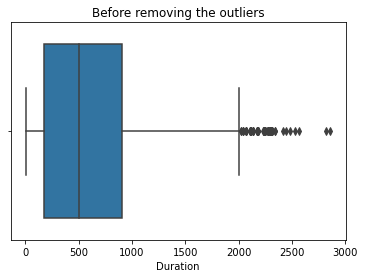

In [47]:
sns.boxplot(df['Duration'])
plt.title('Before removing the outliers')
plt.show()

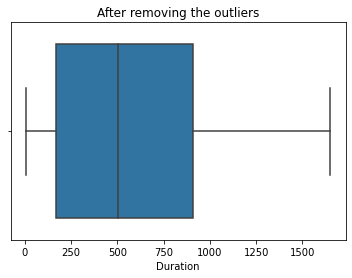

In [48]:
sns.boxplot(data['Duration'])
plt.title('After removing the outliers')
plt.show()

In [49]:
df=data

# Checking and removing the skewness

In [50]:
df.skew()

Airline            0.714589
Source            -0.420657
Destination        1.232043
Duration           0.749439
Total_Stops        0.627085
Additional_Info   -2.096422
Price              1.857641
source            -1.486293
dtype: float64

we will remove skewness only from Duration as other variables are categorical in nature and Price is the target variable.

In [51]:
df['Duration'] = np.cbrt(df['Duration'])

In [52]:
df.skew()

Airline            0.714589
Source            -0.420657
Destination        1.232043
Duration           0.143519
Total_Stops        0.627085
Additional_Info   -2.096422
Price              1.857641
source            -1.486293
dtype: float64

In [53]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,source
0,3.0,0.0,5.0,5.539658,4.0,7.0,3897.0,1
1,1.0,3.0,0.0,7.634607,1.0,7.0,7662.0,1
2,4.0,2.0,1.0,10.446439,1.0,7.0,13882.0,1
3,3.0,3.0,0.0,6.875344,0.0,7.0,6218.0,1
4,3.0,0.0,5.0,6.580844,0.0,7.0,13302.0,1


# Separating train and test from the dataset

In [54]:
train = df.loc[df['source'] == 1]
test = df.loc[df['source'] == 0]

In [55]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)
test.drop('Price', axis = 1, inplace = True)

In [56]:
x = train.drop('Price', axis = 1)
y = train['Price']

In [57]:
x

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info
0,3.0,0.0,5.0,5.539658,4.0,7.0
1,1.0,3.0,0.0,7.634607,1.0,7.0
2,4.0,2.0,1.0,10.446439,1.0,7.0
3,3.0,3.0,0.0,6.875344,0.0,7.0
4,3.0,0.0,5.0,6.580844,0.0,7.0
...,...,...,...,...,...,...
10678,0.0,3.0,0.0,5.313293,4.0,7.0
10679,1.0,3.0,0.0,5.371685,4.0,7.0
10680,4.0,0.0,2.0,5.646216,4.0,7.0
10681,10.0,0.0,5.0,5.428835,4.0,7.0


In [58]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10463, dtype: float64

# Scaling the dataframe

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(x)

In [60]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [61]:
x=df_x

# Finding the best random state

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.45749502067930414 for random state 69


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [64]:
lm=LinearRegression()
dtc=DecisionTreeRegressor()
rf=RandomForestRegressor()

model =[lm,dtc,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=69)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',cvs.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is -0.13467242431993864
Cross validation score for LinearRegression() is 0.40094058222411394
Difference between R2 score and Cross Validation Score is -0.5356130065440525
	
	
R2 score for DecisionTreeRegressor() is 0.5985802917807348
Cross validation score for DecisionTreeRegressor() is 0.667192796558866
Difference between R2 score and Cross Validation Score is -0.06861250477813119
	
	
R2 score for RandomForestRegressor() is 0.6306138645250273
Cross validation score for RandomForestRegressor() is 0.699110474432701
Difference between R2 score and Cross Validation Score is -0.0684966099076737
	
	


Radom Forest Regressor is giving least difference between R2 score and Cross validation score.

# Hyperparameter tuning of RandomForestRegressor

In [588]:
from sklearn.model_selection import GridSearchCV

In [589]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [592]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [593]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [604]:
rfr = RandomForestRegressor(random_state=69, max_features='sqrt', n_estimators= 500, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))

0.6843921486601778


In [605]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for ',rfr, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=500,
                      random_state=69)  model is : 0.7112237645336986


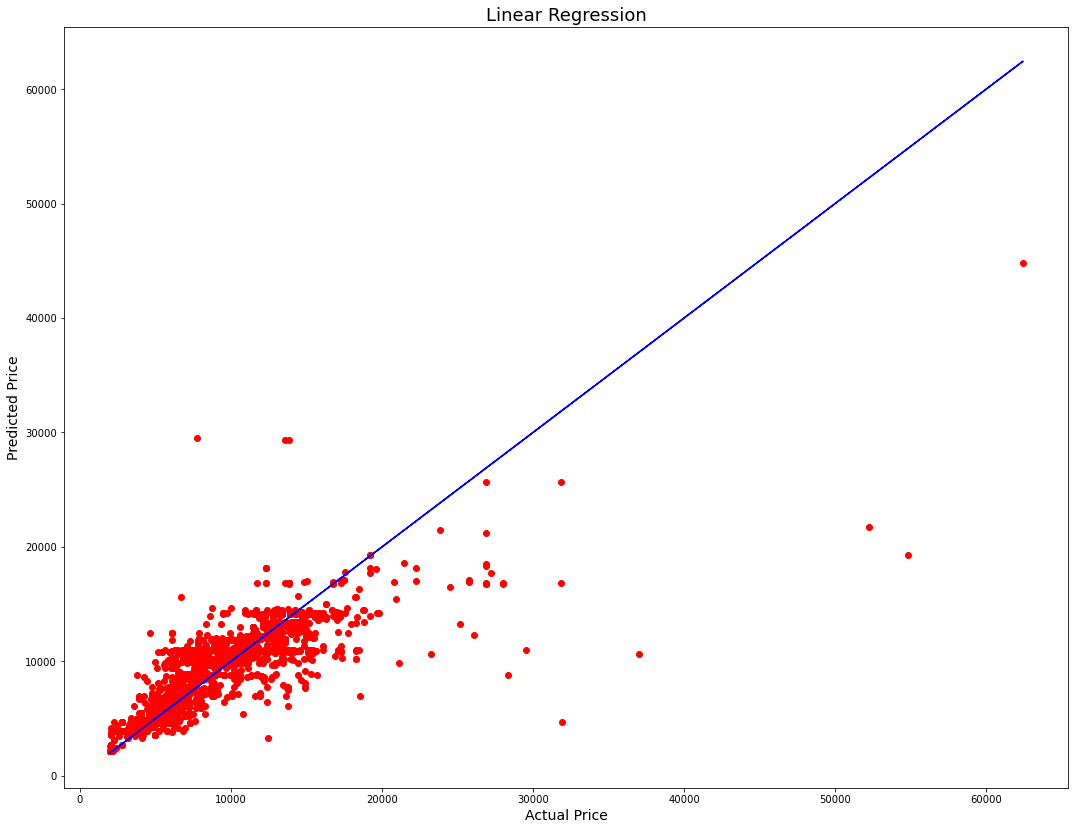

In [606]:
plt.figure(figsize = (18, 14))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Price', fontsize = 14)
plt.ylabel('Predicted Price', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [600]:
import pickle

filename = 'flightprice.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [601]:
mod = pickle.load(open('flightprice.pkl', 'rb'))

In [602]:
predictions = mod.predict(test)

In [603]:
predictions

array([8255.80227974, 7948.68100991, 8255.80227974, ..., 8255.80227974,
       8046.96299057, 8255.80227974])